<a href="https://colab.research.google.com/github/BharatXBhalla/Data-Analytics-CDAC/blob/main/LabTest/Q2_10Year_Stock_Analysis_DA_Lab_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 9.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
from pandas_datareader import data as dr

In [ ]:
stocks = ['GLD','AMZN']

In [ ]:
stock_data = pd.DataFrame()
for s in stocks:
    stock_data[s] = dr.DataReader(s, data_source = 'yahoo', start = '2012-03-02',end='2022-03-02')['Adj Close']

In [ ]:
stock_data.head()

,GLD,AMZN
Date,,
2012-03-02,166.339996,179.300003
2012-03-05,165.649994,180.259995
2012-03-06,162.699997,181.089996
2012-03-07,163.630005,183.770004
2012-03-08,165.279999,187.639999


## Normalizing Returns w.r.t First Day

In [ ]:
normalized_returns = stock_data/stock_data.iloc[0]
normalized_returns.head()

,GLD,AMZN
Date,,
2012-03-02,1.000000,1.000000
2012-03-05,0.995852,1.005354
2012-03-06,0.978117,1.009983
2012-03-07,0.983708,1.024930
2012-03-08,0.993628,1.046514


## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 50% in AMZN
* 50% in GLD


In [ ]:
Allocations = normalized_returns * [0.5,0.5]
Allocations.head()

,GLD,AMZN
Date,,
2012-03-02,0.500000,0.500000
2012-03-05,0.497926,0.502677
2012-03-06,0.489059,0.504992
2012-03-07,0.491854,0.512465
2012-03-08,0.496814,0.523257


## Investment

Let's pretend we invested a 100,000 dollars in this portfolio

In [ ]:
Position_Value = 100000 * Allocations
Position_Value.head()

,GLD,AMZN
Date,,
2012-03-02,50000.000000,50000.000000
2012-03-05,49792.592745,50267.705365
2012-03-06,48905.855636,50499.161533
2012-03-07,49185.405941,51246.514541
2012-03-08,49681.376223,52325.710038


In [ ]:
Position_Value["Total Position"]=Position_Value.sum(axis=1)
Position_Value.head()

,GLD,AMZN,Total Position
Date,,,
2012-03-02,50000.000000,50000.000000,100000.000000
2012-03-05,49792.592745,50267.705365,100060.298110
2012-03-06,48905.855636,50499.161533,99405.017169
2012-03-07,49185.405941,51246.514541,100431.920482
2012-03-08,49681.376223,52325.710038,102007.086261


# Visualize the expected returns on the 10 years series.

<Figure size 720x720 with 0 Axes>

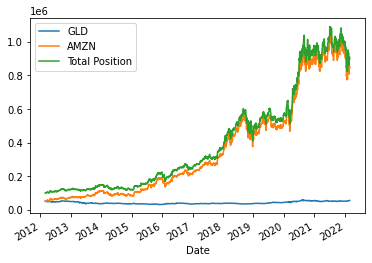

In [ ]:
plt.figure(figsize=(10,10))
(Position_Value).plot()
plt.legend()

## Portfolio Statistics

### Daily Returns(%) for investment for 100000 and 50-50 Split

In [ ]:
Position_Value['Daily Returns %']=Position_Value['Total Position'].pct_change(1)
Position_Value

,GLD,AMZN,Total Position,Daily Returns,Daily Returns %
Date,,,,,
2012-03-02,50000.000000,50000.000000,100000.000000,NaN,NaN
2012-03-05,49792.592745,50267.705365,100060.298110,0.000603,0.000603
2012-03-06,48905.855636,50499.161533,99405.017169,-0.006549,-0.006549
2012-03-07,49185.405941,51246.514541,100431.920482,0.010330,0.010330
2012-03-08,49681.376223,52325.710038,102007.086261,0.015684,0.015684
...,...,...,...,...,...
2022-02-23,53592.039561,807735.635740,861327.675301,-0.033345,-0.033345
2022-02-24,53246.363860,844160.585774,897406.949634,0.041888,0.041888
2022-02-25,53069.017356,857716.109085,910785.126441,0.014908,0.014908


### Average Daily Return(%)

In [ ]:
Position_Value['Daily Returns %'].mean()

0.0010036970674348884

#### Standard Daily Return(%)

In [ ]:
Position_Value['Daily Returns %'].std()

0.01621629763805832

### Sharpe Ratio (Daily Return)
Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

Assuming 6% risk free Anually which is .06/365 Per day

In [ ]:
Risk_Free_Rate = 0.06/365
SR = ( Position_Value['Daily Returns %'].mean() - Risk_Free_Rate ) / Position_Value['Daily Returns %'].std()

print("Sharpe Ratio(Daily)=",SR)

Sharpe Ratio(Daily)= 0.05175740631580743


Annualized Sharpe Ration

In [ ]:
ASR=(252**0.5)*SR

print("Sharpe Ration(Annualized)= ",ASR)

Sharpe Ration(Annualized)=  0.8216233537041013


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

### For Timeseries Plotting Autocorrelation Plots on Total Position Value

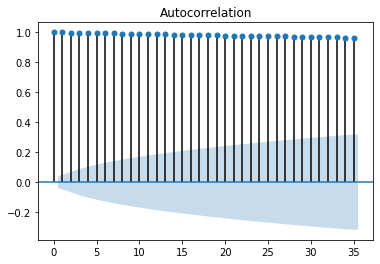

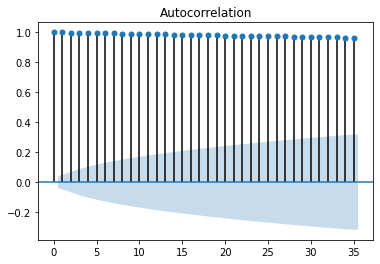

In [ ]:
plot_acf(Position_Value["Total Position"],ax=plt.gca())

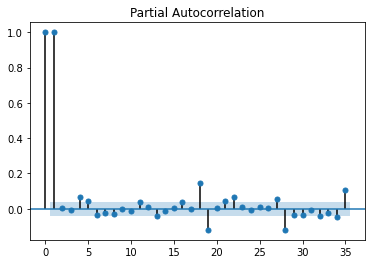

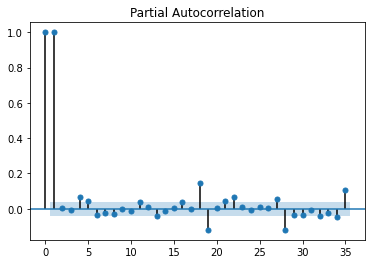

In [ ]:
plot_pacf(Position_Value["Total Position"],ax=plt.gca())

## Correlation Between Two Stocks on Daily

In [ ]:
=Position_Value[["GLD","AMZN"]].corr()

,GLD,AMZN
GLD,1.000000,0.601514
AMZN,0.601514,1.000000


## Stimulating On Various Weights on Stocks for Optimal Portfolio construction

Variance Return Total = sigma1^2 + sigma2 ^2 + 2* sigma1 * sigma2

sigma1 = Variance Return of stock 1
sigma2 = Variance Return of stock 2

In [ ]:
expectedReturn = []
standardDeviation = []
weight1 = []
weight2 = []

In [ ]:
for i in range(1000):
    weights = np.random.random(2)
    weights = weights/ weights.sum()
    weight1.append(weights[0])
    weight2.append(weights[1])
    expectedReturn.append((weights * (Allocations/Allocations.shift(1)).mean()).sum() * 250)
    standardDeviation.append(np.sqrt(np.dot(weights.T, np.dot((Allocations/Allocations.shift(1)).cov() * 250, weights))))

In [ ]:
weight1 = np.array(weight1)
weight2 = np.array(weight2)
expectedReturn = np.array(expectedReturn) 
standardDeviation = np.array(standardDeviation)

In [ ]:
#Creating dataframe
df = pd.DataFrame({"Weight of GLD": weight1, "Weight of AMZN": weight2, "Expected Return": expectedReturn, "Standard deviation": standardDeviation})
df.head()

,Weight of GLD,Weight of AMZN,Expected Return,Standard deviation
0,0.329360,0.670640,250.225825,0.210193
1,0.325250,0.674750,250.227088,0.211268
2,0.738866,0.261134,250.100055,0.135912
3,0.126967,0.873033,250.287986,0.266644
4,0.519728,0.480272,250.167358,0.165658


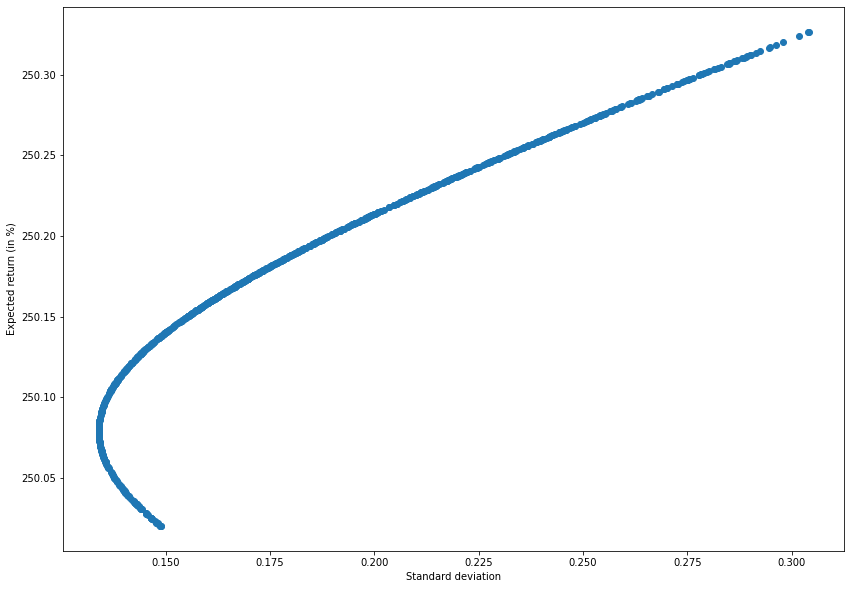

In [ ]:
plt.figure(figsize=(14, 10))
plt.scatter(df["Standard deviation"], df["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

In [ ]:
df.head()

,Weight of GLD,Weight of AMZN,Expected Return,Standard deviation
0,0.329360,0.670640,250.225825,0.210193
1,0.325250,0.674750,250.227088,0.211268
2,0.738866,0.261134,250.100055,0.135912
3,0.126967,0.873033,250.287986,0.266644
4,0.519728,0.480272,250.167358,0.165658


## Optimal Value for portfolio lies between when expected Return is between 250.10 and 250.05

In [ ]:
optimal_value_range=df[(df["Expected Return"]> 250.05) & (df["Expected Return"]< 250.15)].sort_values(by="Standard deviation")

In [ ]:
optimal_value_range.head()

,Weight of GLD,Weight of AMZN,Expected Return,Standard deviation
464,0.808832,0.191168,250.078566,0.133900
795,0.809300,0.190700,250.078422,0.133901
340,0.803777,0.196223,250.080119,0.133906
172,0.802464,0.197536,250.080522,0.133911
999,0.801922,0.198078,250.080688,0.133914


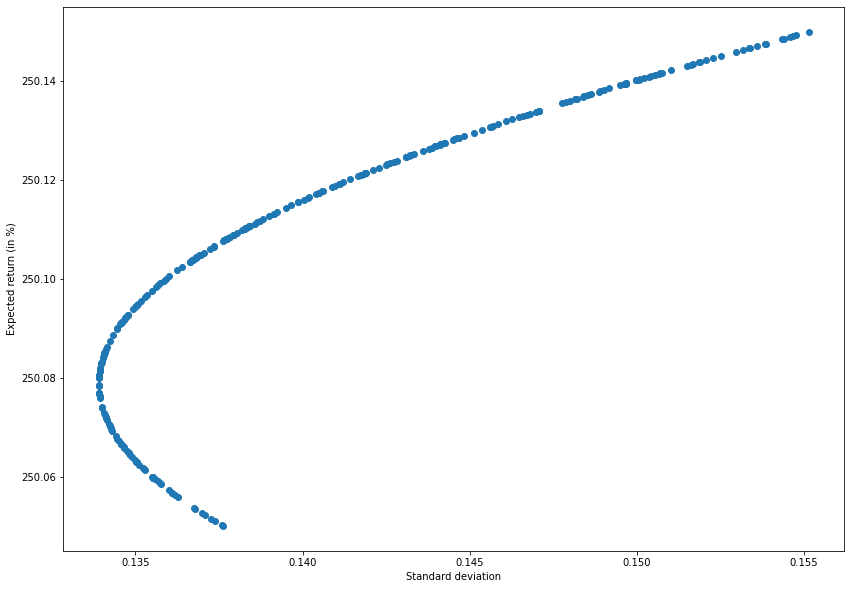

In [ ]:
plt.figure(figsize=(14, 10))
plt.scatter(optimal_value_range["Standard deviation"], optimal_value_range["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

In [ ]:
df[(df["Expected Return"]>= 250.08) & (df["Expected Return"]< 250.10)].sort_values(by="Standard deviation").tail()

,Weight of GLD,Weight of AMZN,Expected Return,Standard deviation
504,0.746495,0.253505,250.097711,0.135493
433,0.743945,0.256055,250.098495,0.135628
840,0.742898,0.257102,250.098816,0.135685
710,0.741834,0.258166,250.099143,0.135744
24,0.740070,0.259930,250.099685,0.135843


## Optimal Weight for Portfoiio is 

## 74 %    for GLD
## 25.99 % for AMAZN